In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

# Remplace 'chemin_vers_fichier.pk' par le chemin de ton fichier .pk
with open('fichier_global.pk', 'rb') as fichier:
    data = pickle.load(fichier)




In [3]:
data.head()

,Solid_class,Element,Shape,Distance,Size_parameters,Eq_Radius,n_Atoms,qmin,qmax,qstep,b_iso,q,Intensities,polydispersity
0,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760072.0, 8737556.0, 8700139.0, 8647997.0, 8...",0
1,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.3,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760070.0, 8737548.0, 8700119.0, 8647962.0, 8...",0
2,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.5,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760067.0, 8737539.0, 8700101.0, 8647928.0, 8...",0
3,Platonic,Ag,cubefcc,2.888885,"(2, 0, 0)",7.076294,63,0.01,20,0.01,0.9,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[8760063.0, 8737522.0, 8700062.0, 8647859.0, 8...",0
4,Platonic,Al,cubefcc,2.852398,"(2, 0, 0)",6.98692,63,0.01,20,0.01,0.1,"[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.0...","[670041.8, 668334.06, 665496.56, 661542.0, 656...",0


In [4]:
data.dtypes

Solid_class         object
Element             object
Shape               object
Distance           float64
Size_parameters     object
Eq_Radius           object
n_Atoms             object
qmin               float64
qmax                object
qstep              float64
b_iso              float64
q                   object
Intensities         object
polydispersity      object
dtype: object

In [21]:
data['Solid_class'] = data['Solid_class'].astype('category')
data['Element'] = data['Element'].astype('category')
data['Shape'] = data['Shape'].astype('category')

# Convertir 'Size_parameters', 'Eq_Radius', 'qmax' en float
#data['Size_parameters'] = data['Size_parameters'].astype(float)
data['Eq_Radius'] = pd.to_numeric(data['Eq_Radius'], errors='coerce')
data['qmax'] = pd.to_numeric(data['qmax'], errors='coerce')

# Convertir 'n_Atoms' et 'polydispersity' en int
data['n_Atoms'] = pd.to_numeric(data['n_Atoms'], errors='coerce').astype('Int64')
data['polydispersity'] = pd.to_numeric(data['polydispersity'], errors='coerce').astype('Int64')


# Convertir 'q' et 'Intensities' en numpy array
# data['q'] = data['q'].apply(lambda x: np.array(eval(x)))
# data['Intensities'] = data['Intensities'].apply(lambda x: np.array(eval(x)))


In [22]:
data.dtypes

Solid_class        category
Element            category
Shape              category
Distance            float64
Size_parameters      object
Eq_Radius           float64
n_Atoms               Int64
qmin                float64
qmax                float64
qstep               float64
b_iso               float64
q                    object
Intensities          object
polydispersity        Int64
dtype: object

In [24]:
data_num=data.drop(["Solid_class","Element","Shape","Size_parameters","q","Intensities"],axis=1)

Text(0.5, 1.0, 'Polydispersity')

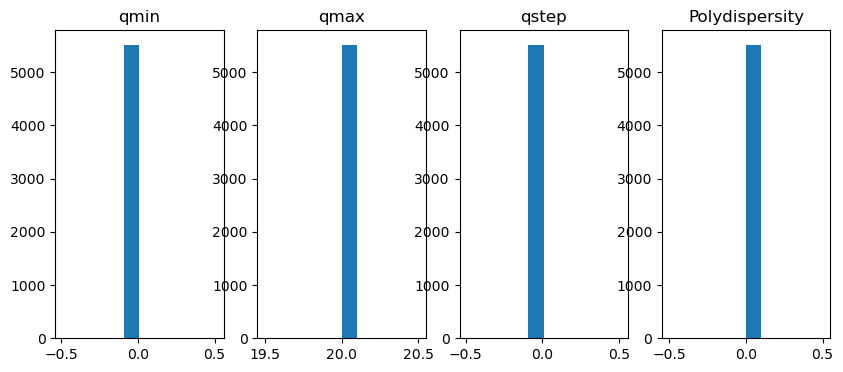

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["qmin"])
plt.title("qmin")
plt.subplot(1,4,2)
plt.hist(data["qmax"])
plt.title("qmax")
plt.subplot(1,4,3)
plt.hist(data["qstep"])
plt.title("qstep")
plt.subplot(1,4,4)
plt.hist(data["polydispersity"])
plt.title("Polydispersity")


Text(0.5, 1.0, 'Element')

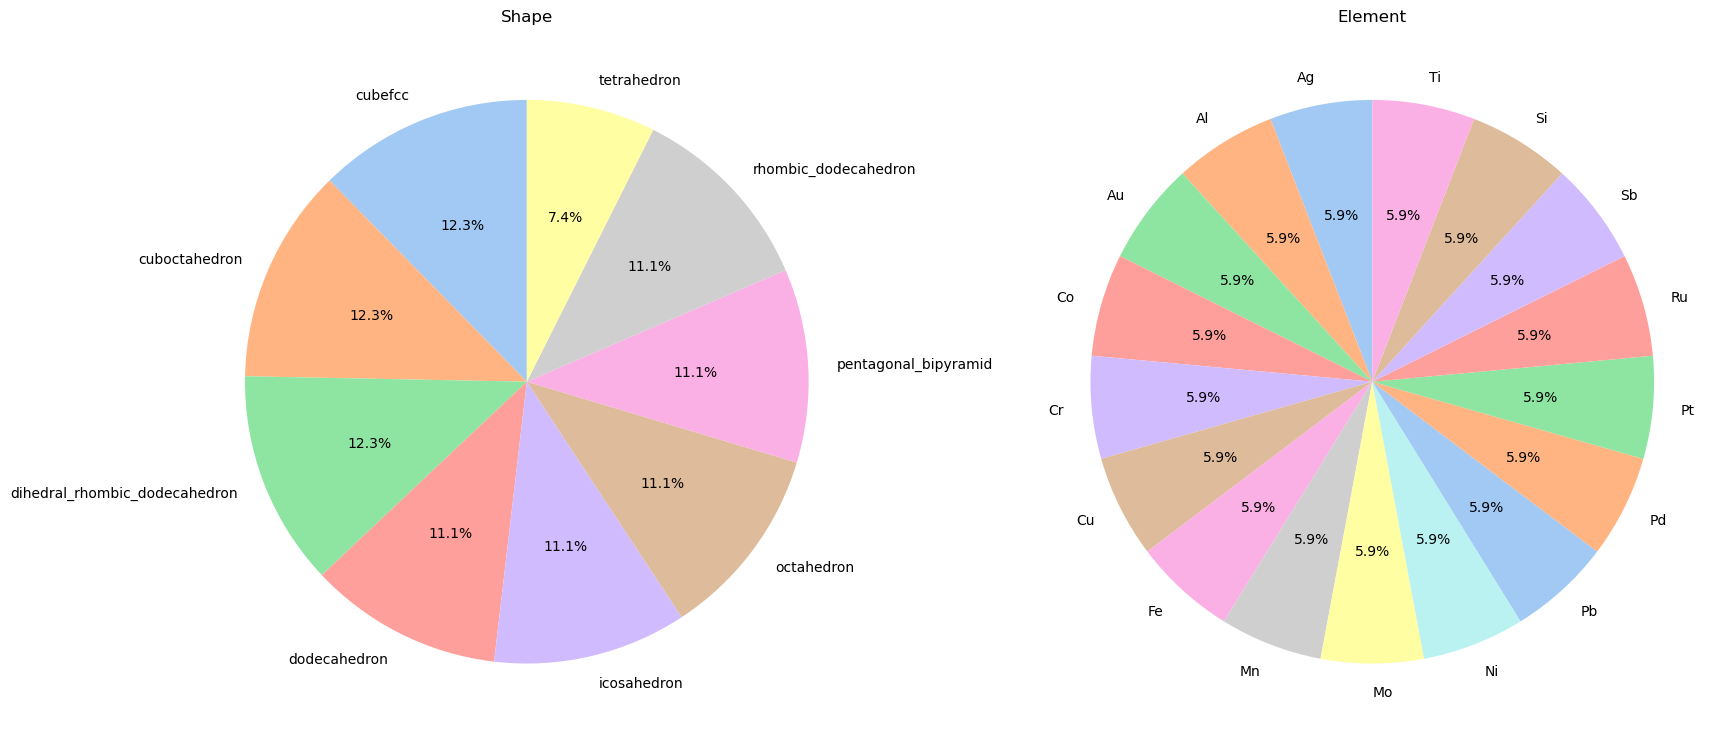

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.pie(data['Shape'].value_counts(),labels=np.unique(data["Shape"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Shape")
plt.subplot(1,2,2)
plt.pie(data['Element'].value_counts(),labels=np.unique(data["Element"]),autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Element")

Text(0.5, 1.0, 'b_iso')

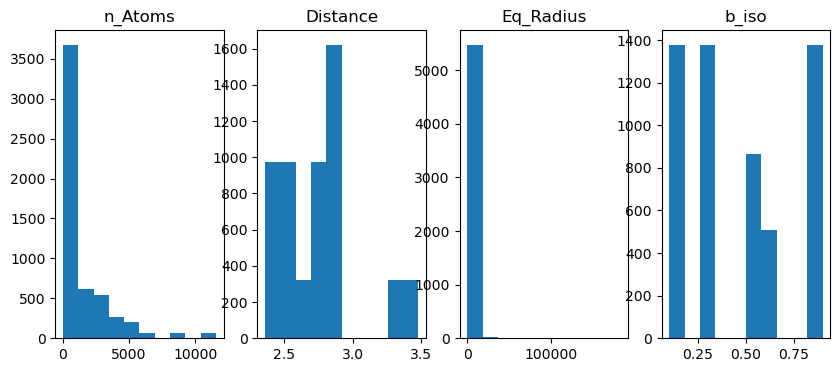

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plt.hist(data["n_Atoms"])
plt.title("n_Atoms")
plt.subplot(1,4,2)
plt.hist(data["Distance"])
plt.title("Distance")
plt.subplot(1,4,3)
plt.hist(data["Eq_Radius"])
plt.title("Eq_Radius")
plt.subplot(1,4,4)
plt.hist(data["b_iso"])
plt.title("b_iso")